### Flight presentation profile visualiser

You can use this notebook to plot the presentation profile for flight IDs. Click on the button to generate the presentation profile for a randomly selected Flight ID. 

The distribution of the profile which you need to predict will be plotted along with any historical presentation profiles for the flight ID. Note that not all target Flight IDs will have historical flight data.

In [30]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML
from ipywidgets import widgets
from IPython.display import display, Javascript

from ggplot import *

%matplotlib inline

In [31]:
def rerun_cell(btn):
    display(Javascript('IPython.notebook.execute_cell()'))

In [32]:
# transposes dataset from wide (the target data for each flight is in 17 columns) to long (the target data for each flight is in 17 rows)
def create_transposed_df(df_this_df, s_index_col):
    
    df_transposed = df_this_df.transpose().reset_index()
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed.ix[1:]

    df_transposed = df_transposed.set_index(s_index_col)

    l_15_min_intervals = ['0-14','15-29','30-44','45-59', '60-74', '75-89', '90-104', '105-119', '120-134', '135-149', '150-164', '165-179', '180-194', '195-209', '210-224', '225-239', '240 plus']
    df_transposed.index = l_15_min_intervals

    return df_transposed

In [33]:
# creates presentation profile charts
def create_plot(df_for_charting, s_title, l_linewidths):
    
    fig_pres_profile, ax = plt.subplots(figsize = (16,7))
    for col, lw in zip(df_for_charting.columns, l_linewidths):
        df_for_charting[col].plot(lw=lw, ax=ax)

    ax.set_xlabel("15 Minute Block prior to sceheduled departure time")
    ax.set_xticklabels(df_for_charting.index, rotation = 90)
    ax.set_xticks(range(len(df_for_charting.index)))
    ax.invert_xaxis()
    ax.set_ylabel("Num Pax")
    ax.legend(title = None, loc = 'best')
    ax.set_title(s_title)
    
    return fig_pres_profile

In [34]:
s_raw_data_folder = 'S:/Public/ADA Team/Hackathon/'
s_raw_data_file = 'train.csv' 

df_raw_data_amt = pd.read_csv(s_raw_data_folder + s_raw_data_file, parse_dates = ['dt_prediction_date', 'dt_target_date', 'dt_flight_date'])

In [35]:
l_cols_to_use = ['cat_case_type', 'dt_flight_date', 'num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt', 
                   'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt', 'num_pax_060_074_mins_before_sdt', 
                   'num_pax_075_089_mins_before_sdt', 'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt', 
                   'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt', 'num_pax_150_164_mins_before_sdt', 
                   'num_pax_165_179_mins_before_sdt',  'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt', 
                   'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt', 'num_pax_240plus_mins_before_sdt']

l_target_vars = ['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt', 
                   'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt', 'num_pax_060_074_mins_before_sdt', 
                   'num_pax_075_089_mins_before_sdt', 'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt', 
                   'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt', 'num_pax_150_164_mins_before_sdt', 
                   'num_pax_165_179_mins_before_sdt',  'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt', 
                   'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt', 'num_pax_240plus_mins_before_sdt']

In [36]:
# Start by creating a column for the total pax per flight
df_raw_data_amt['total_pax'] = df_raw_data_amt.loc[:,l_target_vars].sum(axis=1)

### Model Details and Presentation Profile

<IPython.core.display.Javascript object>

Model Type
    • Model type is 01_day.

Model Details
    • Target flight date is 04-05-2015.
    • Prediction is made on 03-05-2015.

Historical Flight Details
    • There are 15 historical flights for this target.
    • Historical flights are for 0, 1, 2, 3, 4, 5, 6, 13, 20, 27, 90, 181, 363, 545 and 727 days prior to the prediction date.

Pax Numbers
    • A total of 157 passengers presented at security screening for the target flight.
    • The average number of passengers for this flight's explanatory variables is 101.

Additional Information
    • Flight is to city category 300.
    • This is in the destination group 14.
    • This flight is not a long haul flight.


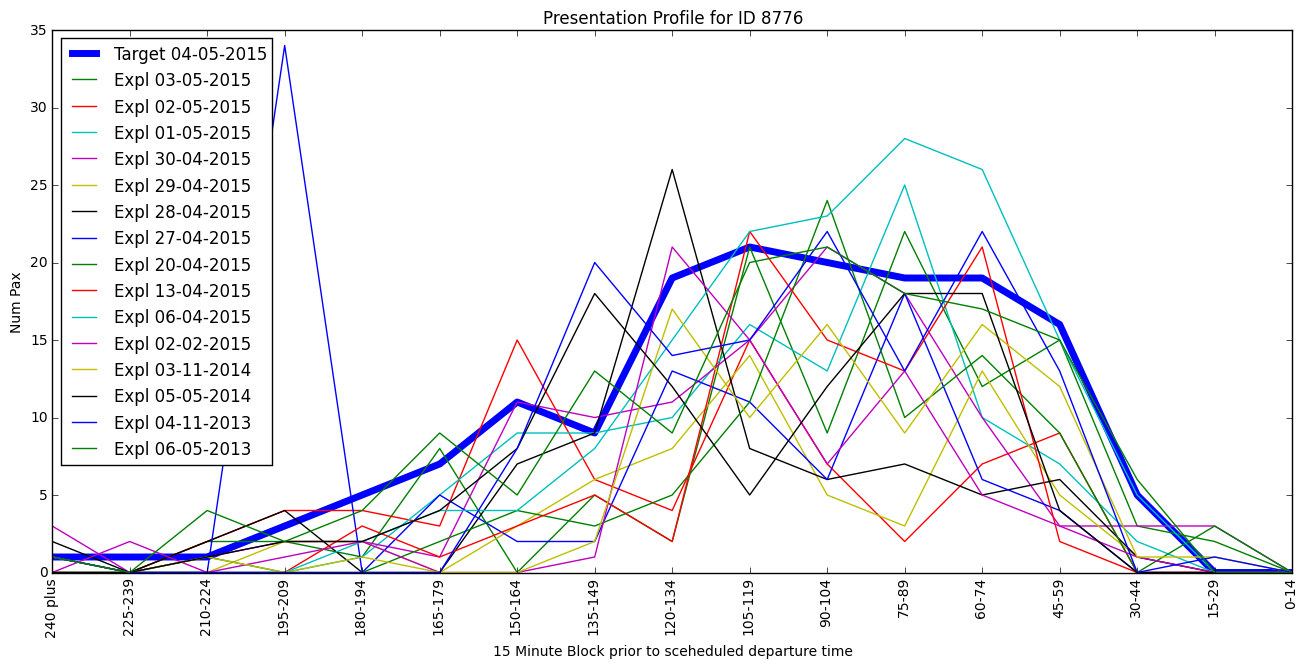

In [45]:
# Plot the presentation profile for some examples
btn = widgets.Button(description="View New ID")
btn.on_click(rerun_cell)
display(btn)
# select a random ID or overwrite with a manual ID
i_id = np.random.choice(df_raw_data_amt['id'].unique())

df_this_pred = df_raw_data_amt[(df_raw_data_amt['id'] == i_id) & (df_raw_data_amt['cat_case_type'] == 'Expl')]
i_num_preds = len(df_this_pred)

# what time periods have we got for explanatory variables?
if i_num_preds > 0:
    l_time_from_prediction = []
    row_num = 1

    for row in (df_this_pred['dt_prediction_date'] - df_this_pred['dt_flight_date']):

        if row_num == len(df_this_pred['dt_prediction_date'] - df_this_pred['dt_flight_date']):
            s_num_days = str(row.days) + ' days'
        elif row_num == len(df_this_pred['dt_prediction_date'] - df_this_pred['dt_flight_date']) - 1:
            s_num_days = str(row.days) + ' and '
        else:
            s_num_days = str(row.days) + ', '
        l_time_from_prediction.append(s_num_days)
        row_num = row_num + 1

df_this_target = df_raw_data_amt[(df_raw_data_amt['id'] == i_id) & (df_raw_data_amt['cat_case_type'] == 'Target')]
s_target_flight_date = pd.to_datetime(str(df_this_target['dt_target_date'].unique()[0])).strftime('%d-%m-%Y')
s_prediction_flight_date = pd.to_datetime(str(df_this_target['dt_prediction_date'].unique()[0])).strftime('%d-%m-%Y')
i_cat_city = df_this_target['cat_i_city'].unique()[0]
i_cat_dest = df_this_target['cat_destination_group_id'].unique()[0]
i_longhaul = df_this_target['cat_longhaul_ind'].unique()[0]
s_model_type = df_this_target['s_model_type'].unique()[0]

df_this_id = df_raw_data_amt[df_raw_data_amt['id'] == i_id][l_cols_to_use + ['total_pax']]

# Get the total number of passengers on the flight and the average over the historical data
i_target_total_pax = df_this_id[df_this_id['cat_case_type'] == 'Target']['total_pax'].unique()[0]
if i_num_preds > 0:
    i_avg_pax_for_expl = int(round(df_this_id[df_this_id['cat_case_type'] == 'Expl']['total_pax'].mean(),0))


df_this_id['case_type_and_flight'] = df_this_id['cat_case_type'] + ' ' + df_this_id['dt_flight_date'].dt.strftime('%d-%m-%Y') 

s_case_type_and_flight = df_this_id['case_type_and_flight']
df_this_id.drop('case_type_and_flight', axis=1,inplace = True)
df_this_id.insert(0, 'case_type_and_flight', s_case_type_and_flight)

df_this_id.drop(['cat_case_type', 'dt_flight_date', 'total_pax'], axis=1, inplace=True)

# Transpose the dataframe
df_this_id_transposed = create_transposed_df(df_this_id, 'case_type_and_flight')
# Set the linewidths, the first, the target, set to 5, all explanatory left at 1
l_linewidths = [5] + [1]*(df_this_id_transposed.shape[1] - 1)
# Plot the data
s_title = 'Presentation Profile for ID ' + str(i_id)
fig_pres_profile =  create_plot(df_this_id_transposed, s_title, l_linewidths)

print('\x1b[31;1mModel Type\x1b[0m')
print(u'    \u2022 Model type is ' + s_model_type + '.')

print('\x1b[31;1m\nModel Details\x1b[0m')
print(u'    \u2022 Target flight date is ' + s_target_flight_date + '.')
print(u'    \u2022 Prediction is made on ' + s_prediction_flight_date + '.') 

print('\x1b[31;1m\nHistorical Flight Details\x1b[0m')
if i_num_preds == 0:
    print(u'    \u2022 There is no historical flight data for this target.')
elif i_num_preds == 1:
    print(u'    \u2022 There is data for 1 historical flight for this target.')
    print(u'    \u2022 Historical flight data is for ' + ''.join(str(x) for x in l_time_from_prediction) + ' prior to the prediction date.') 
else:
    print(u'    \u2022 There are ' + str(i_num_preds) + ' historical flights for this target.')
    print(u'    \u2022 Historical flights are for ' + ''.join(str(x) for x in l_time_from_prediction) + ' prior to the prediction date.')

print('\x1b[31;1m\nPax Numbers\x1b[0m')
print(u'    \u2022 A total of ' + str(i_target_total_pax) + ' passengers presented at security screening for the target flight.')
if i_num_preds > 0:
    print(u"    \u2022 The average number of passengers for this flight""'s explanatory variables is " + str(i_avg_pax_for_expl) + '.')

print('\x1b[31;1m\nAdditional Information\x1b[0m')
s_long_haul = ''
if i_longhaul == 1:
    s_long_haul = 'is'
else:
    s_long_haul = 'is not'

print(u'    \u2022 Flight is to city category ' + str(i_cat_city) + '.')
print(u'    \u2022 This is in the destination group ' + str(i_cat_dest) + '.')
print(u'    \u2022 This flight ' + s_long_haul + ' a long haul flight.')

In [38]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.<br/>
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')